In [1]:
! pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 14.7 MB/s 
     |████████████████████████████████| 62 kB 773 kB/s 
     |████████████████████████████████| 289 kB 43.1 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 103 kB 70.2 MB/s 
     |████████████████████████████████| 286 kB 47.6 MB/s 
     |████████████████████████████████| 1.0 MB 44.1 MB/s 
     |████████████████████████████████| 802 kB 37.7 MB/s 
     |████████████████████████████████| 41 kB 525 kB/s 
     |████████████████████████████████| 132 kB 66.0 MB/s 
     |████████████████████████████████| 60.2 MB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 63.0 MB/s 
     |████████████████████████████████| 280 kB 60.4 MB/s 
     |████████████████████████████████| 5.3 MB 55.6 MB/s 
     |████████████████████████████████|

In [2]:
! pip install biovec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 1.4 MB/s 
  Created wheel for biovec: filename=biovec-0.2.7-py3-none-any.whl size=3464 sha256=25d495ca9131f40f92d3f72741305d2811dd1450cbd3983b9fa5fa8e91eb6892
  Stored in directory: /root/.cache/pip/wheels/9f/c6/89/87aaf7b2d49ed06c0c8843e576bea4dddbb480b49a5a9f9088
  Created wheel for gensim: filename=gensim-3.4.0-cp38-cp38-linux_x86_64.whl size=23477313 sha256=f32e2b715dc40f8c6a1aa0e99add92da1f49a4d724a95d5faf98fa170a0960c1
  Stored in directory: /root/.cache/pip/wheels/b4/a4/71/a301cdb2b7d5d31525936fcb8dcd9a5f144578d047407f7cf9
  Created wheel for pyfasta: filename=pyfasta-0.5.2-py3-none-any.whl size=14237 sha256=29cdfb9f0a647b0c50f39e86b42abcf16170a33207559e200d075668af15d7f5
  Stored in directory: /root/.cache/pip/wheels/60/3a/d7/9739d86ad827f1dfcd9da43c9fd38a03c6d4a26d2ce25e440d
Successfully built biovec gensim pyfasta
  Attempting unin

In [3]:
%cd drive/MyDrive/altegrad

/content/drive/MyDrive/altegrad


In [4]:
import csv
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Read sequences
sequences = list()
with open('sequences.txt', 'r') as f:
    for line in f:
        sequences.append(line[:-1])

# Split data into training and test sets
sequences_train = list()
sequences_test = list()
proteins_test = list()
y_train = list()
with open('graph_labels.txt', 'r') as f:
    for i,line in enumerate(f):
        t = line.split(',')
        if len(t[1][:-1]) == 0:
            proteins_test.append(t[0])
            sequences_test.append(sequences[i])
        else:
            sequences_train.append(sequences[i])
            y_train.append(int(t[1][:-1]))

In [6]:
import biovec

In [11]:
# load trained model from file
pv = biovec.models.load_protvec('./trained_models/swissprot-reviewed-protvec.model')
# The n-gram "QAT" should be trained in advance
pv["QAT"]

<ipython-input-11-14afa44e9751>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  pv["QAT"]


array([-0.20047757,  0.13725135, -0.10776459, -0.03988836, -0.25079745,
        0.02516149, -0.1313679 , -0.05690108, -0.12585396, -0.08874963,
       -0.00987209,  0.00428959, -0.03061717, -0.05079481, -0.02382791,
        0.10785093, -0.01119577,  0.1893255 ,  0.00766951,  0.1435206 ,
        0.09309836,  0.1327024 ,  0.00992472,  0.20075706, -0.14169848,
       -0.15805547,  0.11509287,  0.01078152,  0.05373042, -0.20570517,
       -0.02243278,  0.05274799, -0.03098309, -0.07374841,  0.21411812,
        0.09525644,  0.1958006 , -0.07958729, -0.09688383,  0.0249608 ,
       -0.28554833, -0.12672788, -0.24720827,  0.07065818,  0.2242358 ,
        0.07164016, -0.05939398,  0.04065467,  0.19061244, -0.1391368 ,
        0.1351258 ,  0.20704754, -0.10781614, -0.09110644, -0.05133961,
        0.1104934 , -0.02802765, -0.06398305,  0.05319667,  0.09419137,
        0.03209281, -0.00834275,  0.09588817, -0.14302117, -0.05838508,
       -0.03565074,  0.14781825, -0.06208167,  0.03841728, -0.09

In [16]:
# convert whole amino acid sequence into three vectors
np.concatenate(pv.to_vecs("ATATQSQSMTEEL")).shape

(300,)

In [17]:
def protein_vectorizer(pv, sequences):
  vecs = []
  for seq in sequences:
    vecs.append(np.concatenate(pv.to_vecs(seq)))
  return np.array(vecs)

In [18]:
X_train = protein_vectorizer(pv, sequences_train)
X_test = protein_vectorizer(pv, sequences_test)

In [ ]:
# vec = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
# X_train = vec.fit_transform(sequences_train)
# X_test = vec.transform(sequences_test)

In [20]:
X_train.shape, X_test.shape

((4888, 300), (1223, 300))

In [21]:
import scipy.sparse as sp
# X = np.vstack((X_train.toarray(), X_test.toarray()))
X = np.vstack((X_train, X_test))
X.shape

(6111, 300)

In [22]:
X_sparse = sp.csr_matrix(X)
from sklearn.decomposition import PCA, TruncatedSVD
# pca = PCA()
# pca.fit(X)
svd = TruncatedSVD(n_components=100)
svd.fit(X)

TruncatedSVD(n_components=100)

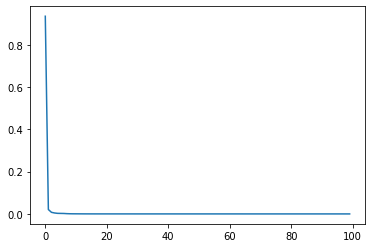

In [23]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_ratio_)

In [24]:
X_new = svd.transform(X)

In [25]:
X_train_new,X_test_new = np.split(X_new,[X_train.shape[0]])

In [26]:
X_train_new.shape, X_test_new.shape

((4888, 100), (1223, 100))

In [27]:
import pandas as pd
df_train = pd.DataFrame(X_train_new)

In [28]:
df_test = pd.DataFrame(X_test_new)

In [29]:
df_train.columns = range(df_train.shape[1])

In [30]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,109.356285,-3.833646,1.947854,-3.292883,-3.311949,-3.826015,2.099040,0.767798,2.387406,1.107896,...,0.157269,0.009353,1.469527,-0.574874,-0.819050,-1.247810,-0.380742,0.439964,-0.922429,0.744784
1,95.190033,3.552568,-1.110898,1.178499,-3.149377,2.008976,0.319801,2.897786,1.612790,0.802957,...,-1.144361,0.307865,-0.397985,-0.630404,-0.072420,0.736623,0.101293,0.568477,0.358596,0.272354
2,91.898407,4.611051,-9.922841,-3.976764,2.506440,-3.109526,0.744523,-2.573282,-0.899285,-0.975165,...,0.857180,0.173358,0.051491,0.699263,0.703107,0.195032,-1.067464,0.141507,-0.181663,-0.193661
3,130.014771,-0.600953,10.946375,-12.460989,7.522354,-5.938076,-4.659488,4.595666,-1.887816,1.056845,...,1.295376,1.773097,-0.730816,0.430094,1.107836,-1.247855,0.662269,-0.096713,-0.239922,0.811489
4,159.222198,15.575222,-13.679247,8.938797,5.937868,9.212132,-7.184511,-0.538958,1.536754,4.107922,...,-0.326325,-0.220549,1.570862,-0.138844,-0.994112,0.336825,-0.717504,-0.661034,1.895639,-2.432443


In [ ]:
np.unique(y_train,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([440,  50, 939,  60, 112, 625, 202,  74, 998,  57,  43, 305,  44,
         59, 548, 226,  60,  46]))

In [31]:
df_train['class'] = y_train

In [32]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,109.356285,-3.833646,1.947854,-3.292883,-3.311949,-3.826015,2.099040,0.767798,2.387406,1.107896,...,0.009353,1.469527,-0.574874,-0.819050,-1.247810,-0.380742,0.439964,-0.922429,0.744784,8
1,95.190033,3.552568,-1.110898,1.178499,-3.149377,2.008976,0.319801,2.897786,1.612790,0.802957,...,0.307865,-0.397985,-0.630404,-0.072420,0.736623,0.101293,0.568477,0.358596,0.272354,4
2,91.898407,4.611051,-9.922841,-3.976764,2.506440,-3.109526,0.744523,-2.573282,-0.899285,-0.975165,...,0.173358,0.051491,0.699263,0.703107,0.195032,-1.067464,0.141507,-0.181663,-0.193661,8
3,130.014771,-0.600953,10.946375,-12.460989,7.522354,-5.938076,-4.659488,4.595666,-1.887816,1.056845,...,1.773097,-0.730816,0.430094,1.107836,-1.247855,0.662269,-0.096713,-0.239922,0.811489,8
4,159.222198,15.575222,-13.679247,8.938797,5.937868,9.212132,-7.184511,-0.538958,1.536754,4.107922,...,-0.220549,1.570862,-0.138844,-0.994112,0.336825,-0.717504,-0.661034,1.895639,-2.432443,15


In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='class', eval_metric='log_loss').fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20221213_063533/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221213_063533/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    4888
Train Data Columns: 100
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	First 10 (of 18) unique label values:  [8, 4, 15, 2, 5, 14, 6, 0, 7, 11]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 18
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:          

In [ ]:
predictor.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.220885       0.200842  765.194100                0.001560           1.401763            2       True         14
1              CatBoost  -1.334743       0.019316  713.954813                0.019316         713.954813            1       True          8
2               XGBoost  -1.407001       0.047503   44.398861                0.047503          44.398861            1       True         11
3       NeuralNetFastAI  -1.511458       0.038547    5.399112                0.038547           5.399112            1       True          3
4            LightGBMXT  -1.520910       0.035714   39.460021                0.035714          39.460021            1       True          4
5              LightGBM  -1.553152       0.028155   64.017341                0.028155          64.017341            1       True          5
6         LightGBMLa

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.220885,0.200842,765.194100,0.001560,1.401763,2,True,14
1,CatBoost,-1.334743,0.019316,713.954813,0.019316,713.954813,1,True,8
2,XGBoost,-1.407001,0.047503,44.398861,0.047503,44.398861,1,True,11
3,NeuralNetFastAI,-1.511458,0.038547,5.399112,0.038547,5.399112,1,True,3
4,LightGBMXT,-1.520910,0.035714,39.460021,0.035714,39.460021,1,True,4
5,LightGBM,-1.553152,0.028155,64.017341,0.028155,64.017341,1,True,5
6,LightGBMLarge,-1.584544,0.068797,151.553799,0.068797,151.553799,1,True,13
7,RandomForestEntr,-1.598127,0.095928,48.878189,0.095928,48.878189,1,True,7
8,RandomForestGini,-1.616978,0.094932,9.305562,0.094932,9.305562,1,True,6
9,NeuralNetTorch,-1.625181,0.023234,8.842539,0.023234,8.842539,1,True,12


In [ ]:
predictor.refit_full(model='best', set_best_to_refit_full=True)

Fitting 1 L1 models ...
Fitting model: KNeighborsDist_FULL ...
	0.04s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: NeuralNetFastAI_FULL ...
	Stopping at the best epoch learned earlier - 4.
	1.33s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: CatBoost_FULL ...
	558.02s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: XGBoost_FULL ...
	19.37s	 = Training   runtime
Fitting model: WeightedEnsemble_L2_FULL | Skipping fit via cloning parent ...
	1.4s	 = Training   runtime
Updated best model to "WeightedEnsemble_L2_FULL" (Previously "WeightedEnsemble_L2"). AutoGluon will default to using "WeightedEnsemble_L2_FULL" for predict() and predict_proba().


{'KNeighborsDist': 'KNeighborsDist_FULL',
 'NeuralNetFastAI': 'NeuralNetFastAI_FULL',
 'CatBoost': 'CatBoost_FULL',
 'XGBoost': 'XGBoost_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [ ]:
predict_proba = predictor.predict_proba(df_test)

In [ ]:
y_pred_proba = predict_proba.to_numpy()

In [ ]:
with open('sample_submission_log_loss_refit_full.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    lst = list()
    for i in range(18):
        lst.append('class'+str(i))
    lst.insert(0, "name")
    writer.writerow(lst)
    for i, protein in enumerate(proteins_test):
        lst = y_pred_proba[i,:].tolist()
        lst.insert(0, protein)
        writer.writerow(lst)